In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import sys
Path = '/remote/tychodata/ftairli/work/Projects/FD_Reconstruction/Code/'
if Path not in sys.path:
    sys.path.append(Path)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [62]:
# Best Performance for each model

Variables = ['SDP_Theta', 'SDP_Phi','Chi0' ,'Rp', 'Xmax'  ,'Energy','Other']
Units     = ['deg'      , 'deg'    ,'deg'  ,'km', '10g/cm2' ,'10%'   ,'%']

RecPerf   = {'SDP_Theta':0.54774,'SDP_Phi':0.19252 ,'Chi0':0.40264 ,'Rp':0.03790 ,'Xmax':1.95 ,'Energy':.67  ,'Other':1 }
ConvPerf  = {'SDP_Theta':0.66218,'SDP_Phi':0.31257 ,'Chi0':3.7891  ,'Rp':0.7214  ,'Xmax':0    ,'Energy':0    ,'Other':1 }
ReccPerf  = {'SDP_Theta':1.935  ,'SDP_Phi':2.77    ,'Chi0':2.51    ,'Rp':0.427   ,'Xmax':0    ,'Energy':0.   ,'Other':1 } 
GraphPerf = {'SDP_Theta':2.51   ,'SDP_Phi':3.4     ,'Chi0':6.2     ,'Rp':1.2     ,'Xmax':0    ,'Energy':0.0  ,'Other':1 }

# # Best Performance for each model

RecPerf   = {'SDP_Theta':0.54774,'SDP_Phi':0.19252 ,'Chi0':0.40264 ,'Rp':0.03790 ,'Xmax':1.95 ,'Energy':.67  ,'Other':1 }
ConvPerf  = {'SDP_Theta':0.66218,'SDP_Phi':0.31257 ,'Chi0':1.8     ,'Rp':0.371   ,'Xmax':3.63 ,'Energy':1.3  ,'Other':1 }
ReccPerf  = {'SDP_Theta':1.935  ,'SDP_Phi':2.77    ,'Chi0':2.51    ,'Rp':0.427   ,'Xmax':0    ,'Energy':0.   ,'Other':1 } 
GraphPerf = {'SDP_Theta':2.51   ,'SDP_Phi':3.4     ,'Chi0':6.2     ,'Rp':1.2     ,'Xmax':0    ,'Energy':0.0  ,'Other':1 }


9.75


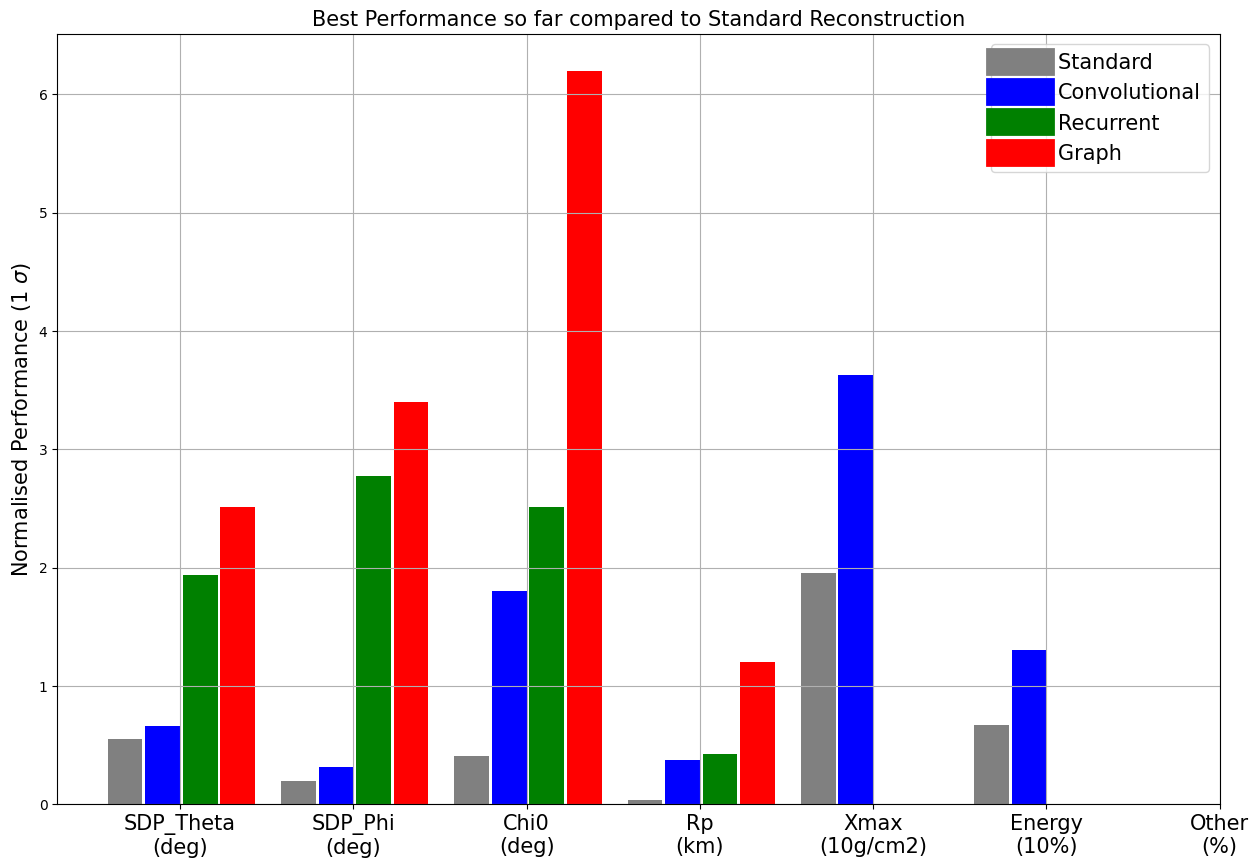

In [63]:
plt.figure(figsize=(15,10))


bar_width = 0.2  # 4 bars
bar_gap   = 0.05/3 # 3 gaps
bar_break = 0.1  # 1 break

colors    = {'Rec':'grey','Conv':'blue','Recc':'green','Graph':'red'}

for i,Var in enumerate(Variables[:6]):
    plt.bar(i-1.5*bar_width-bar_gap   ,RecPerf  [Var]   ,bar_width,color=colors['Rec']   ,label='Rec')
    plt.bar(i-0.5*bar_width           ,ConvPerf [Var]   ,bar_width,color=colors['Conv']  ,label='Conv')
    plt.bar(i+0.5*bar_width+bar_gap   ,ReccPerf [Var]   ,bar_width,color=colors['Recc']  ,label='Recc')
    plt.bar(i+1.5*bar_width+2*bar_gap ,GraphPerf[Var]   ,bar_width,color=colors['Graph'] ,label='Graph')

plt.ylabel('Normalised Performance (1 $\sigma$)',fontsize=15)
Xticklabels = [Var+'\n('+Unit+')' for Var,Unit in zip(Variables,Units)]
plt.xticks(range(len(Variables)),Xticklabels,fontsize=15)

custom_lines = [Line2D([0], [0], color=colors['Rec']  , lw=20),
                Line2D([0], [0], color=colors['Conv'] , lw=20),
                Line2D([0], [0], color=colors['Recc'] , lw=20),
                Line2D([0], [0], color=colors['Graph'], lw=20)]

plt.legend(custom_lines, ['Standard     ', 'Convolutional', 'Recurrent    ', 'Graph        '],fontsize=15)
plt.grid()
plt.title('Best Performance so far compared to Standard Reconstruction',fontsize=15)

Max_Y = max(list(RecPerf.values()))*5
print(Max_Y)

# plt.ylim(0,Max_Y)
# plt.yscale('log')

(0.0, 20.0)

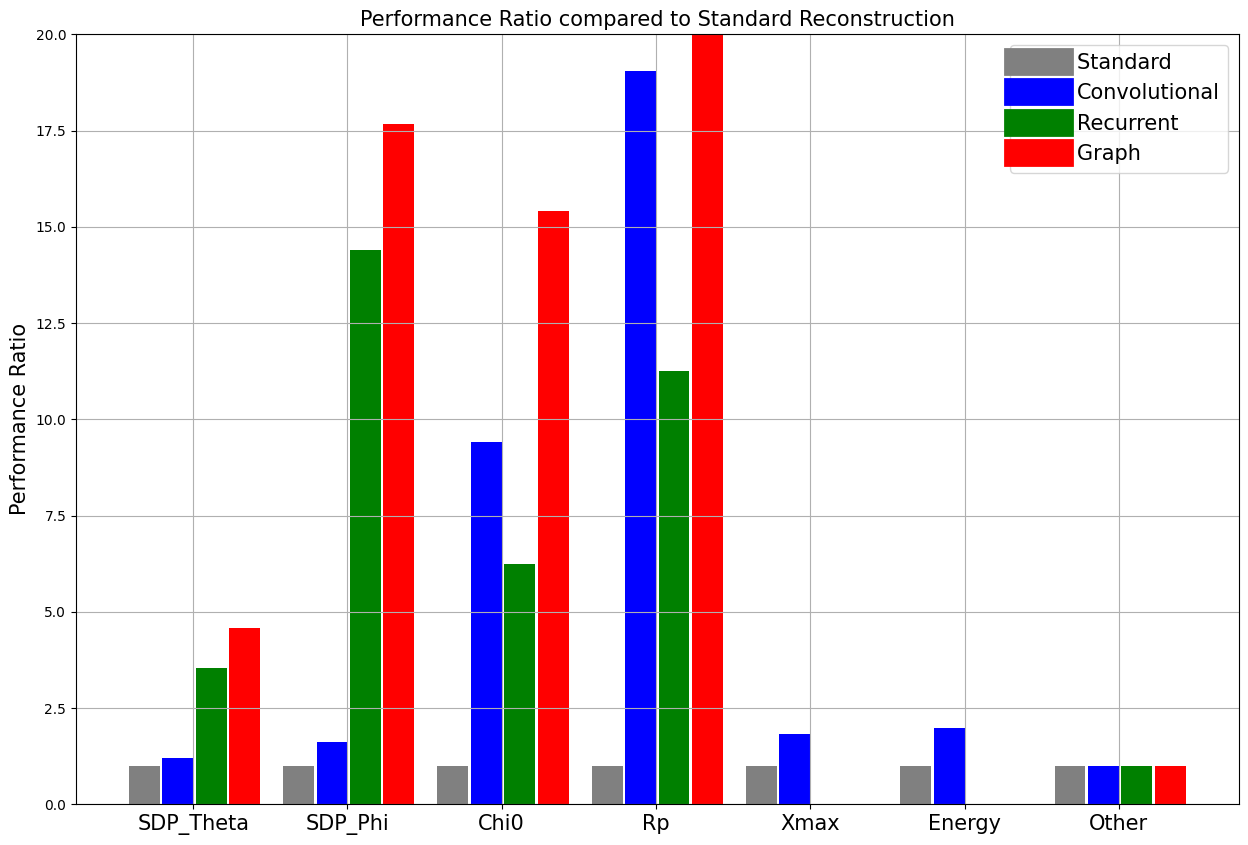

In [53]:
# Now i need to plot the ratio to the standard reconstruction

plt.figure(figsize=(15,10))

for i,Var in enumerate(Variables):
    plt.bar(i-1.5*bar_width-bar_gap   ,RecPerf  [Var]/RecPerf  [Var]   ,bar_width,color=colors['Rec']   ,label='Rec')
    plt.bar(i-0.5*bar_width           ,ConvPerf [Var]/RecPerf  [Var]   ,bar_width,color=colors['Conv']  ,label='Conv')
    plt.bar(i+0.5*bar_width+bar_gap   ,ReccPerf [Var]/RecPerf  [Var]   ,bar_width,color=colors['Recc']  ,label='Recc')
    plt.bar(i+1.5*bar_width+2*bar_gap ,GraphPerf[Var]/RecPerf  [Var]   ,bar_width,color=colors['Graph'] ,label='Graph')

plt.ylabel('Performance Ratio',fontsize=15)
Xticklabels = [Var for Var,Unit in zip(Variables,Units)]
plt.xticks(range(len(Variables)),Xticklabels,fontsize=15)

custom_lines = [Line2D([0], [0], color=colors['Rec']  , lw=20),
                Line2D([0], [0], color=colors['Conv'] , lw=20),
                Line2D([0], [0], color=colors['Recc'] , lw=20),
                Line2D([0], [0], color=colors['Graph'], lw=20)]

plt.legend(custom_lines, ['Standard     ', 'Convolutional', 'Recurrent    ', 'Graph        '],fontsize=15)
plt.grid()
plt.title('Performance Ratio compared to Standard Reconstruction',fontsize=15)

plt.ylim(0,20)
# plt.yscale('log')


In [17]:
# Something else entirely
# scores = [41,38,27,4,30,40,39,41,51,26,45,18,20,34,28,28,39,34,21,31,16,37,22,31,28,24,48,15,32,31,10,48,40,29,15,33,16,25,29,31,48,39,39,47,24,38,26,4,40,44]
# scores = np.array(scores)/0.60
# bins = np.linspace(0,100,10)
# plt.figure(figsize=(15,10))
# sns.histplot(scores,bins=bins,kde=True)

In [18]:
# Also something else entirely

def PrintOutSizes(I_size, padding, kernel_size, stride = 1, dilation = 1):
    O_size = (I_size + padding - dilation*(kernel_size-1) - 1)/stride + 1
    print('1st Out Size:',O_size)
    O_size = np.round(O_size)
    O_size = (O_size + padding - dilation*(kernel_size-1) - 1)/stride + 1
    print('2nd Out Size:',O_size)
    O_size = np.round(O_size)
    O_size = (O_size + padding - dilation*(kernel_size-1) - 1)/stride + 1
    print('3rd Out Size:',O_size)
    O_size = np.round(O_size)
    O_size = (O_size + padding - dilation*(kernel_size-1) - 1)/stride + 1
    print('4th Out Size:',O_size)
    O_size = np.round(O_size)
    O_size = (O_size + padding - dilation*(kernel_size-1) - 1)/stride + 1
    print('5th Out Size:',O_size)
    O_size = np.round(O_size)


PrintOutSizes(1000,24,16,3,1)

1st Out Size: 337.0
2nd Out Size: 116.0
3rd Out Size: 42.333333333333336
4th Out Size: 17.666666666666668
5th Out Size: 9.666666666666666
